## 1.Loading the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from mlxtend.classifier import StackingClassifier

In [3]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

## 2.Loading the Dataset

In [5]:
df_hr=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/nueralnetwork/hr_data.csv')

In [6]:
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df_hr.shape

(14999, 10)

## 3.Exploratory Data Analysis

In [7]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
cols=['Work_accident','left','promotion_last_5years']

for col in cols:
    df_hr[col]=df_hr[col].astype('bool')

In [10]:
for col in cols:
    df_hr[col]=df_hr[col].astype('int')

In [11]:
df_hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [12]:
column=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary']

In [13]:
#Plotting box plot w.r.t.target column

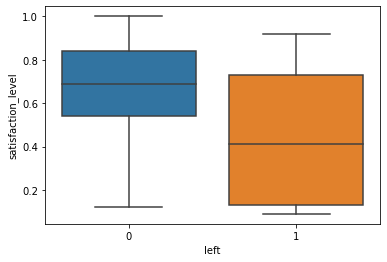

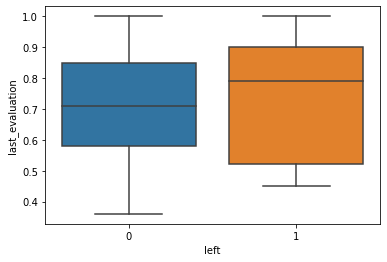

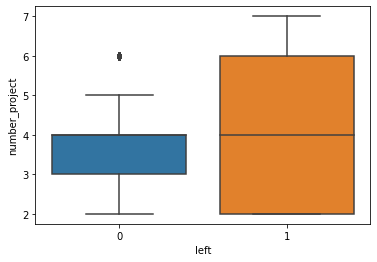

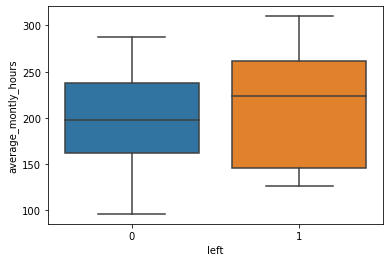

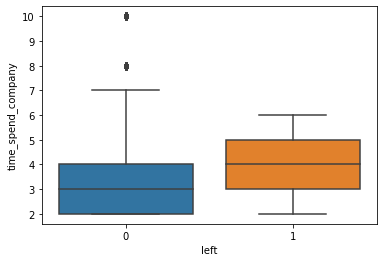

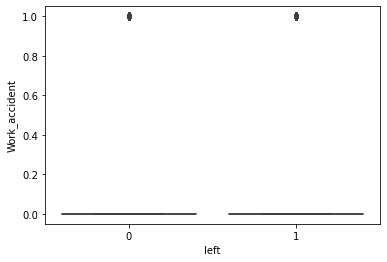

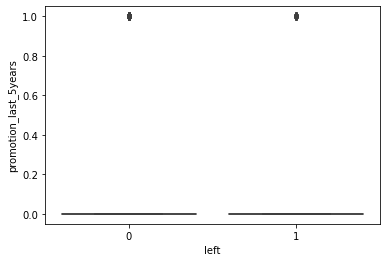

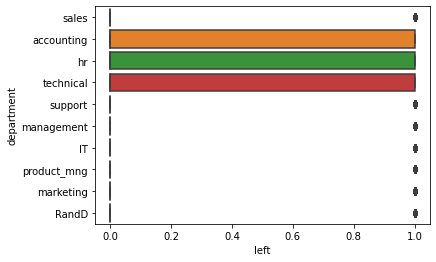

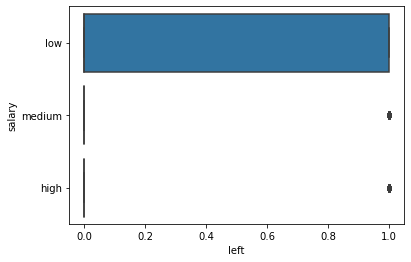

In [14]:
for col in column:
    sns.boxplot(x='left',y=df_hr[col],data=df_hr)
    plt.show()

In [16]:
#Test for Correlation

In [17]:
vcorr=df_hr.corr()

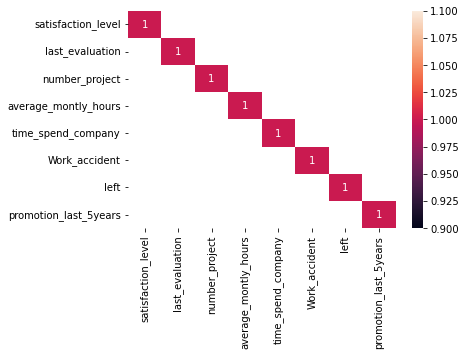

In [18]:
sns.heatmap(vcorr[(vcorr>0.80) | (vcorr<-0.80)],annot=True)
plt.show()

There is no strong correlation between the features.

In [19]:
#Test for Linearity

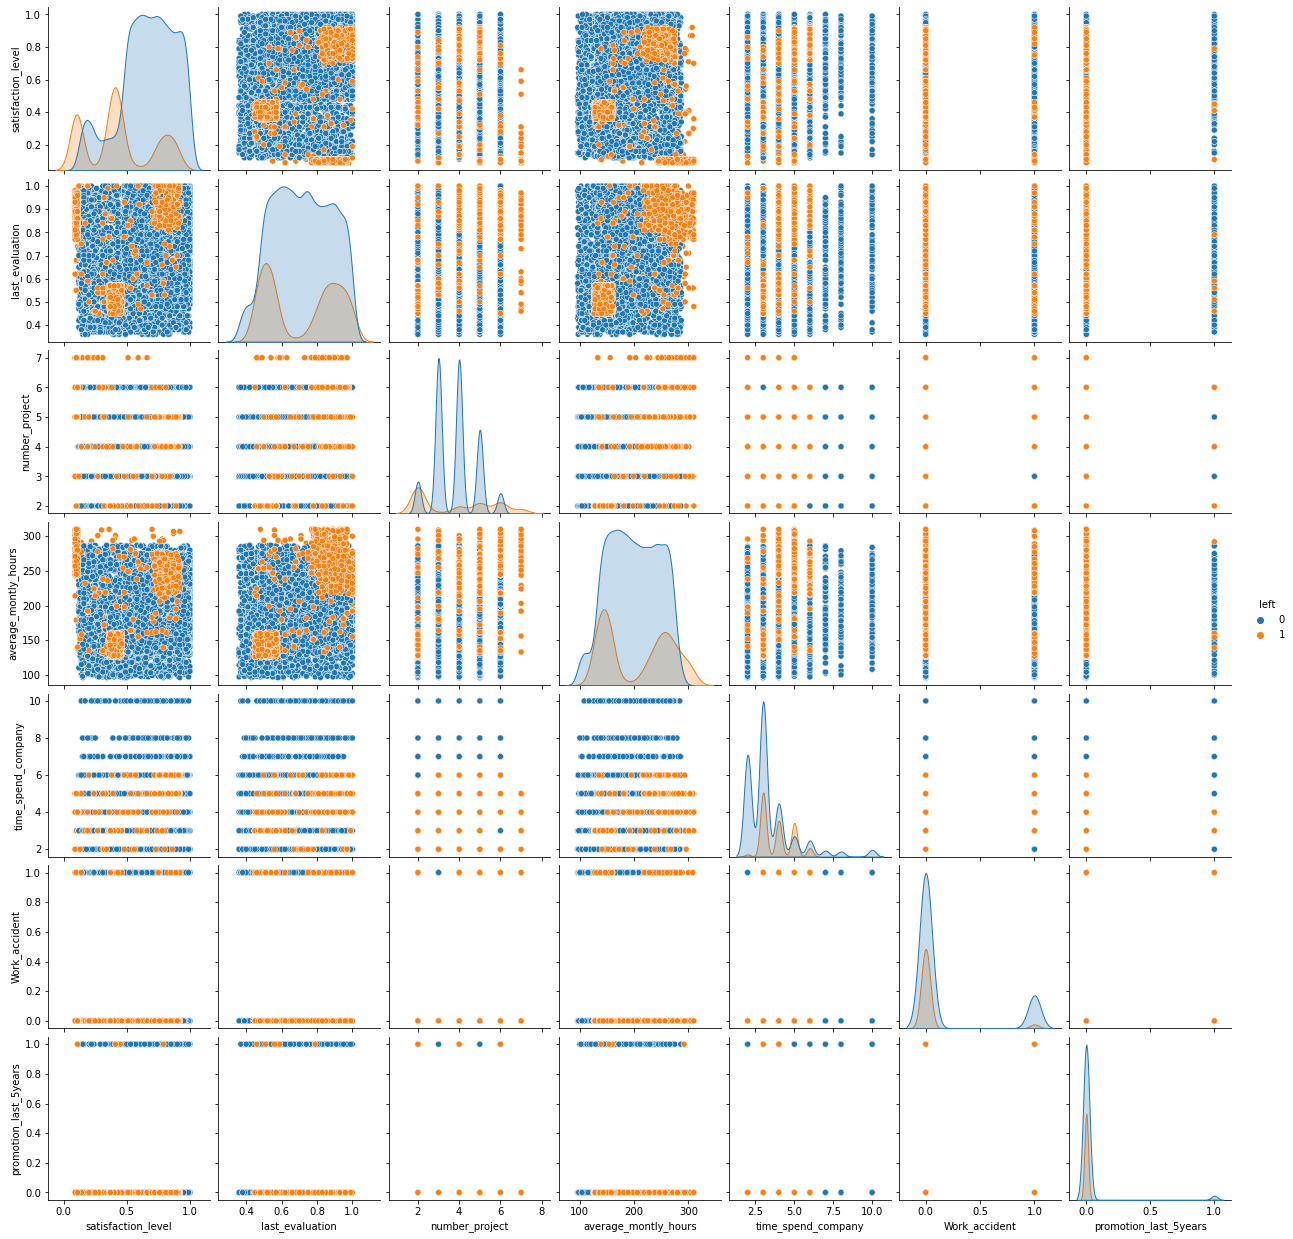

In [20]:
sns.pairplot(data=df_hr,hue='left')
plt.show()

We can see that there is no linear relationship existing between the independent features.

In [21]:
#Test for Normality

In [22]:
cols=['satisfaction_level', 'last_evaluation','average_montly_hours', 'time_spend_company']

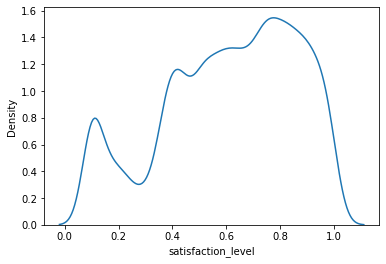

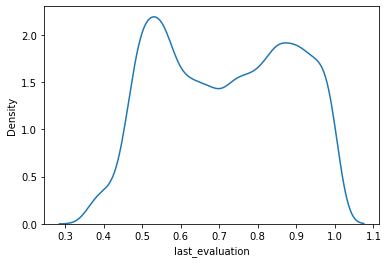

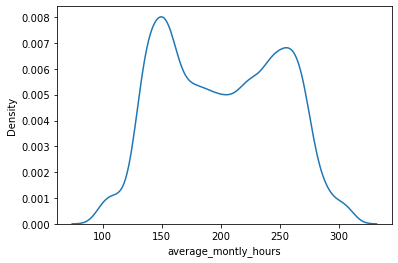

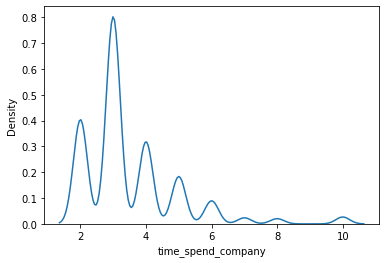

In [23]:
for col in cols:
    sns.kdeplot(x=df_hr[col],data=df_hr)
    plt.show()

In [28]:
#Creating a backup file

In [25]:
df_hr1=df_hr.copy(deep=True)

In [26]:
#dummy encoding

In [27]:
df_hr1_dummy=pd.get_dummies(df_hr1,drop_first=True)

## 3.Separating the dependent and independent variables

In [29]:
X=df_hr1_dummy.drop('left',axis=1)
y=df_hr1_dummy['left']

## 4.Splitting into train and test set

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

## 5.Scaling the data

In [32]:
mn=MinMaxScaler()
X_train_scaled=mn.fit_transform(X_train)
X_test_scaled=mn.transform(X_test)

## 6.Selecting the best parameters

In [34]:
#GridSearchCV

In [33]:
rf=RandomForestClassifier()
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [35]:
tuned_parameters={'n_estimators':[85,100],'min_samples_split':[15,20],'max_depth':[8,10]}

In [36]:
gs_model=GridSearchCV(estimator=rf,param_grid=tuned_parameters,cv=5)
gs_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10], 'min_samples_split': [15, 20],
                         'n_estimators': [85, 100]})

In [37]:
print('best parameters are: ',gs_model.best_params_)

best parameters are:  {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 85}


In [38]:
#finding the no. of neighbors for KNN classifier

In [39]:
k_values=range(3,21)

In [40]:
acc_score={}

In [41]:
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred=knn.predict(X_test_scaled)
    acc_score[k]=accuracy_score(y_test,y_pred)

In [42]:
max(acc_score.values())

0.9493333333333334

In [43]:
max(acc_score,key=acc_score.get)

3

## 7.Model Building

In [45]:
models=[LogisticRegression(),SGDClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),
        RandomForestClassifier(n_estimators=85,min_samples_split=20,max_depth=10),XGBClassifier(dual=False),
       KNeighborsClassifier(n_neighbors=3),AdaBoostClassifier(),GradientBoostingClassifier(),
       LGBMClassifier(),CatBoostClassifier(),SVC(kernel='linear'),SVC(kernel='rbf'),SVC(kernel='sigmoid'),SVC(kernel='poly'),GaussianNB()]

In [46]:
for i in range(16):
    models[i].fit(X_train_scaled,y_train)
    
    print(f'{models[i]}: ')
    y_pred=models[i].predict(X_test_scaled)
    
    print('Accuracy: ',accuracy_score(y_test,y_pred))
    
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test,y_pred))
    
    print('Recall Score: ',recall_score(y_test,y_pred))
    
    print('Precision Score: ',precision_score(y_test,y_pred))
    
    print('Classification Report: ')
    print(classification_report(y_test,y_pred))
    print()

LogisticRegression(): 
Accuracy:  0.7903333333333333
Confusion Matrix: 
[[2108  179]
 [ 450  263]]
Recall Score:  0.3688639551192146
Precision Score:  0.5950226244343891
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2287
           1       0.60      0.37      0.46       713

    accuracy                           0.79      3000
   macro avg       0.71      0.65      0.66      3000
weighted avg       0.77      0.79      0.77      3000


SGDClassifier(): 
Accuracy:  0.802
Confusion Matrix: 
[[2069  218]
 [ 376  337]]
Recall Score:  0.4726507713884993
Precision Score:  0.6072072072072072
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2287
           1       0.61      0.47      0.53       713

    accuracy                           0.80      3000
   macro avg       0.73      0.69      0.70      3000
weighted avg       0.79      0

38:	learn: 0.1450960	total: 789ms	remaining: 19.4s
39:	learn: 0.1428129	total: 803ms	remaining: 19.3s
40:	learn: 0.1408371	total: 819ms	remaining: 19.2s
41:	learn: 0.1391946	total: 838ms	remaining: 19.1s
42:	learn: 0.1373451	total: 855ms	remaining: 19s
43:	learn: 0.1358751	total: 871ms	remaining: 18.9s
44:	learn: 0.1341265	total: 889ms	remaining: 18.9s
45:	learn: 0.1323491	total: 907ms	remaining: 18.8s
46:	learn: 0.1304725	total: 921ms	remaining: 18.7s
47:	learn: 0.1291133	total: 934ms	remaining: 18.5s
48:	learn: 0.1278819	total: 947ms	remaining: 18.4s
49:	learn: 0.1262273	total: 959ms	remaining: 18.2s
50:	learn: 0.1250043	total: 972ms	remaining: 18.1s
51:	learn: 0.1240546	total: 984ms	remaining: 17.9s
52:	learn: 0.1231116	total: 996ms	remaining: 17.8s
53:	learn: 0.1219302	total: 1.01s	remaining: 17.7s
54:	learn: 0.1205374	total: 1.02s	remaining: 17.6s
55:	learn: 0.1195903	total: 1.03s	remaining: 17.5s
56:	learn: 0.1185883	total: 1.05s	remaining: 17.4s
57:	learn: 0.1173228	total: 1.06s

207:	learn: 0.0712595	total: 3.4s	remaining: 12.9s
208:	learn: 0.0711582	total: 3.41s	remaining: 12.9s
209:	learn: 0.0710627	total: 3.43s	remaining: 12.9s
210:	learn: 0.0709984	total: 3.44s	remaining: 12.9s
211:	learn: 0.0708908	total: 3.46s	remaining: 12.9s
212:	learn: 0.0707055	total: 3.48s	remaining: 12.9s
213:	learn: 0.0706075	total: 3.5s	remaining: 12.8s
214:	learn: 0.0704230	total: 3.52s	remaining: 12.8s
215:	learn: 0.0702717	total: 3.53s	remaining: 12.8s
216:	learn: 0.0701457	total: 3.55s	remaining: 12.8s
217:	learn: 0.0700434	total: 3.57s	remaining: 12.8s
218:	learn: 0.0699295	total: 3.58s	remaining: 12.8s
219:	learn: 0.0698316	total: 3.6s	remaining: 12.8s
220:	learn: 0.0697164	total: 3.62s	remaining: 12.7s
221:	learn: 0.0696304	total: 3.63s	remaining: 12.7s
222:	learn: 0.0694840	total: 3.65s	remaining: 12.7s
223:	learn: 0.0694280	total: 3.67s	remaining: 12.7s
224:	learn: 0.0693173	total: 3.68s	remaining: 12.7s
225:	learn: 0.0692119	total: 3.7s	remaining: 12.7s
226:	learn: 0.06

373:	learn: 0.0557911	total: 6.05s	remaining: 10.1s
374:	learn: 0.0557540	total: 6.07s	remaining: 10.1s
375:	learn: 0.0556842	total: 6.08s	remaining: 10.1s
376:	learn: 0.0556428	total: 6.1s	remaining: 10.1s
377:	learn: 0.0555914	total: 6.12s	remaining: 10.1s
378:	learn: 0.0555012	total: 6.13s	remaining: 10.1s
379:	learn: 0.0554523	total: 6.15s	remaining: 10s
380:	learn: 0.0553023	total: 6.17s	remaining: 10s
381:	learn: 0.0552558	total: 6.18s	remaining: 10s
382:	learn: 0.0551993	total: 6.2s	remaining: 9.99s
383:	learn: 0.0550479	total: 6.22s	remaining: 9.97s
384:	learn: 0.0549799	total: 6.23s	remaining: 9.96s
385:	learn: 0.0549139	total: 6.25s	remaining: 9.94s
386:	learn: 0.0548439	total: 6.26s	remaining: 9.92s
387:	learn: 0.0548031	total: 6.28s	remaining: 9.9s
388:	learn: 0.0547734	total: 6.29s	remaining: 9.88s
389:	learn: 0.0546909	total: 6.31s	remaining: 9.86s
390:	learn: 0.0546349	total: 6.32s	remaining: 9.85s
391:	learn: 0.0545784	total: 6.34s	remaining: 9.83s
392:	learn: 0.0545069

537:	learn: 0.0446703	total: 8.64s	remaining: 7.42s
538:	learn: 0.0446338	total: 8.66s	remaining: 7.4s
539:	learn: 0.0445834	total: 8.67s	remaining: 7.39s
540:	learn: 0.0445158	total: 8.69s	remaining: 7.37s
541:	learn: 0.0444550	total: 8.71s	remaining: 7.36s
542:	learn: 0.0443934	total: 8.72s	remaining: 7.34s
543:	learn: 0.0443101	total: 8.74s	remaining: 7.33s
544:	learn: 0.0442467	total: 8.76s	remaining: 7.31s
545:	learn: 0.0441845	total: 8.77s	remaining: 7.29s
546:	learn: 0.0441125	total: 8.79s	remaining: 7.28s
547:	learn: 0.0440532	total: 8.8s	remaining: 7.26s
548:	learn: 0.0439945	total: 8.81s	remaining: 7.24s
549:	learn: 0.0439445	total: 8.83s	remaining: 7.22s
550:	learn: 0.0438595	total: 8.84s	remaining: 7.2s
551:	learn: 0.0437962	total: 8.85s	remaining: 7.18s
552:	learn: 0.0437423	total: 8.87s	remaining: 7.17s
553:	learn: 0.0436742	total: 8.88s	remaining: 7.15s
554:	learn: 0.0436201	total: 8.9s	remaining: 7.13s
555:	learn: 0.0435623	total: 8.91s	remaining: 7.12s
556:	learn: 0.04

709:	learn: 0.0369743	total: 11.3s	remaining: 4.59s
710:	learn: 0.0369180	total: 11.3s	remaining: 4.58s
711:	learn: 0.0368879	total: 11.3s	remaining: 4.56s
712:	learn: 0.0368359	total: 11.3s	remaining: 4.54s
713:	learn: 0.0367978	total: 11.3s	remaining: 4.53s
714:	learn: 0.0367661	total: 11.3s	remaining: 4.51s
715:	learn: 0.0367320	total: 11.3s	remaining: 4.49s
716:	learn: 0.0367164	total: 11.3s	remaining: 4.47s
717:	learn: 0.0366784	total: 11.4s	remaining: 4.46s
718:	learn: 0.0366340	total: 11.4s	remaining: 4.44s
719:	learn: 0.0365973	total: 11.4s	remaining: 4.42s
720:	learn: 0.0365763	total: 11.4s	remaining: 4.41s
721:	learn: 0.0365081	total: 11.4s	remaining: 4.39s
722:	learn: 0.0364462	total: 11.4s	remaining: 4.37s
723:	learn: 0.0364208	total: 11.4s	remaining: 4.36s
724:	learn: 0.0363974	total: 11.4s	remaining: 4.34s
725:	learn: 0.0363671	total: 11.5s	remaining: 4.32s
726:	learn: 0.0363227	total: 11.5s	remaining: 4.3s
727:	learn: 0.0362816	total: 11.5s	remaining: 4.29s
728:	learn: 0

873:	learn: 0.0315961	total: 13.4s	remaining: 1.93s
874:	learn: 0.0315680	total: 13.4s	remaining: 1.92s
875:	learn: 0.0315224	total: 13.4s	remaining: 1.9s
876:	learn: 0.0314730	total: 13.4s	remaining: 1.89s
877:	learn: 0.0314355	total: 13.5s	remaining: 1.87s
878:	learn: 0.0314175	total: 13.5s	remaining: 1.85s
879:	learn: 0.0313793	total: 13.5s	remaining: 1.84s
880:	learn: 0.0313323	total: 13.5s	remaining: 1.82s
881:	learn: 0.0313102	total: 13.5s	remaining: 1.81s
882:	learn: 0.0312774	total: 13.5s	remaining: 1.79s
883:	learn: 0.0312332	total: 13.6s	remaining: 1.78s
884:	learn: 0.0311853	total: 13.6s	remaining: 1.76s
885:	learn: 0.0311567	total: 13.6s	remaining: 1.75s
886:	learn: 0.0311252	total: 13.6s	remaining: 1.73s
887:	learn: 0.0310733	total: 13.6s	remaining: 1.72s
888:	learn: 0.0310558	total: 13.6s	remaining: 1.7s
889:	learn: 0.0310056	total: 13.7s	remaining: 1.69s
890:	learn: 0.0309867	total: 13.7s	remaining: 1.67s
891:	learn: 0.0309671	total: 13.7s	remaining: 1.66s
892:	learn: 0.

Accuracy:  0.6693333333333333
Confusion Matrix: 
[[1787  500]
 [ 492  221]]
Recall Score:  0.30995792426367463
Precision Score:  0.3065187239944521
Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2287
           1       0.31      0.31      0.31       713

    accuracy                           0.67      3000
   macro avg       0.55      0.55      0.55      3000
weighted avg       0.67      0.67      0.67      3000


SVC(kernel='poly'): 
Accuracy:  0.9416666666666667
Confusion Matrix: 
[[2206   81]
 [  94  619]]
Recall Score:  0.8681626928471248
Precision Score:  0.8842857142857142
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2287
           1       0.88      0.87      0.88       713

    accuracy                           0.94      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.94      0.94   

From the Classification report, we can find that Random Forest Classifier has worked better as compared to other models, with a test accuracy of 99% and a recall score of 97.5%.

## 8.Building the Neural Network

In [47]:
X_train_scaled.shape

(11999, 18)

In [48]:
classifier=Sequential()

In [49]:
classifier.add(Dense(128,kernel_initializer='uniform',activation='relu',input_dim=18))
Dropout(0.2)
classifier.add(Dense(64,kernel_initializer='uniform',activation='relu'))
Dropout(0.1)

In [50]:
classifier.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

In [51]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2432      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,753
Trainable params: 10,753
Non-trainable params: 0
_________________________________________________________________


In [53]:
es=EarlyStopping(monitor='loss',patience=3)

In [54]:
h_callback=classifier.fit(X_train_scaled,y_train,batch_size=16,epochs=100,validation_data=[X_train_scaled,y_train],callbacks=es)

Epoch 1/100
750/750 [==============================] - 5s 5ms/step - loss: 0.4064 - accuracy: 0.8157 - val_loss: 0.2793 - val_accuracy: 0.8957
Epoch 2/100
750/750 [==============================] - 4s 5ms/step - loss: 0.2109 - accuracy: 0.9266 - val_loss: 0.1799 - val_accuracy: 0.9397
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1758 - accuracy: 0.9462 - val_loss: 0.1592 - val_accuracy: 0.9513
Epoch 4/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1667 - accuracy: 0.9491 - val_loss: 0.1572 - val_accuracy: 0.9540
Epoch 5/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1625 - accuracy: 0.9500 - val_loss: 0.1521 - val_accuracy: 0.9529
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1581 - accuracy: 0.9528 - val_loss: 0.1573 - val_accuracy: 0.9510
Epoch 7/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1558 - accuracy: 0.9537 - val_loss: 0.1457 - val_accuracy: 0.9567

Epoch 58/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0643 - accuracy: 0.9792 - val_loss: 0.0593 - val_accuracy: 0.9806
Epoch 59/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0677 - accuracy: 0.9788 - val_loss: 0.0636 - val_accuracy: 0.9789
Epoch 60/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0631 - accuracy: 0.9800 - val_loss: 0.0570 - val_accuracy: 0.9820
Epoch 61/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0656 - accuracy: 0.9792 - val_loss: 0.0576 - val_accuracy: 0.9809
Epoch 62/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0637 - accuracy: 0.9787 - val_loss: 0.0522 - val_accuracy: 0.9835
Epoch 63/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0623 - accuracy: 0.9787 - val_loss: 0.0536 - val_accuracy: 0.9840
Epoch 64/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0618 - accuracy: 0.9805 - val_loss: 0.0590 - val_accuracy:

In [56]:
y_pred=classifier.predict(X_test_scaled)

94/94 [==============================] - 0s 2ms/step


In [57]:
y_pred=np.round(y_pred)

In [58]:
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Classification Report: ')
print(classification_report(y_test,y_pred))

Accuracy:  0.9726666666666667
Confusion Matrix: 
[[2250   37]
 [  45  668]]
Recall Score:  0.9368863955119214
Precision Score:  0.9475177304964539
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2287
           1       0.95      0.94      0.94       713

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



With Neural Network, we got a test accuracy of 97% and recall value of 94%.

In [59]:
h_callback.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

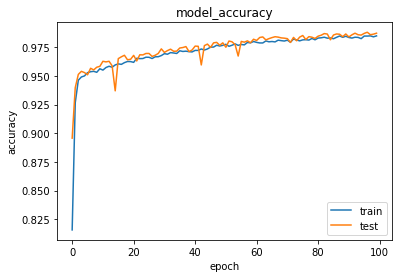

In [60]:
plt.plot(h_callback.history['accuracy'])
plt.plot(h_callback.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

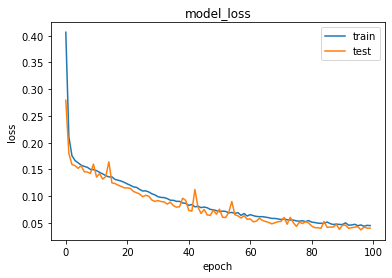

In [61]:
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()